# Assignment 7 clustering

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt

In [2]:
data = pd.ExcelFile('C:\\Users\\user\\Desktop\\EXCELR ASSIGNMENT\\ASSIGNMENT\\assignment7_clustering\\EastWestAirlines.xlsx')

In [3]:
df = pd.read_excel( data, 'data')

In [4]:
df.head(5) # showing first five data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


# Normalization function

In [5]:
def norm(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [6]:
# we use normalization to reduce the huge numbers into smaller ones

In [7]:
norm_data = norm(df.iloc[:,1:])

In [8]:
norm_data.head(5)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


In [9]:
# here we can see that features like [balance],[Bonus_miles] has reduced to smaller number using normalization

In [10]:
from scipy.cluster.hierarchy import linkage

In [11]:
import scipy.cluster.hierarchy as sch

In [12]:
sch.dendrogram?  # dendrogram def and its syntax

In [13]:
z=linkage(norm_data,method='complete',metric='euclidean')

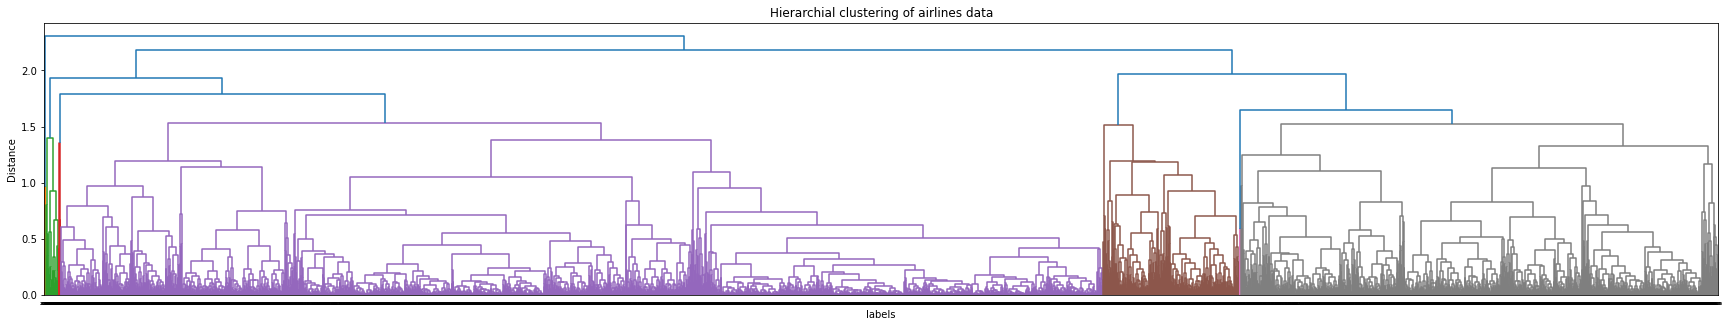

In [14]:
plt.figure(figsize=(30,5));
plt.title('Hierarchial clustering of airlines data')
plt.xlabel('labels')
plt.ylabel('Distance')

sch.dendrogram(z,leaf_rotation=0,leaf_font_size=4)

plt.show()


# Performing hierarchical clustering

In [15]:
from sklearn.cluster import AgglomerativeClustering

In [16]:
h_clust=AgglomerativeClustering(n_clusters=5,linkage='complete',affinity='euclidean')

In [17]:
df2=h_clust.fit(norm_data)

In [18]:
df2.labels_

array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [19]:
clust_labels=pd.Series(df2.labels_)

In [20]:
df['clust']=clust_labels

In [21]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [22]:
df=df.iloc[:,[12,0,1,2,3,4,5,6,7,8,9,10,11]]

In [23]:
df.head()

,clust,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,0,2,19244,0,1,1,1,215,2,0,0,6968,0
2,0,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,0,4,14776,0,1,1,1,500,1,0,0,6952,0
4,1,5,97752,0,4,1,1,43300,26,2077,4,6935,1


# Grouping clusters by their mean

In [24]:
df.iloc[:,3:].groupby(df.clust).mean()

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clust,,,,,,,,,,
0,88.883768,1.712224,1.000401,1.011222,10271.530261,9.105812,227.797194,0.656112,3825.392786,0.000802
1,208.673846,4.661538,1.000000,1.061538,70477.086154,23.249231,1019.433846,3.196923,5770.572308,1.000000
2,248.550699,2.104895,1.009615,1.000874,16882.864510,13.412587,739.958916,2.236888,4304.383741,1.000000
3,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000
4,32.258065,1.000000,2.483871,1.000000,14618.870968,16.129032,443.225806,1.967742,3784.258065,0.193548


# performing KMeans clustering

In [25]:
from sklearn.cluster import KMeans 
from scipy.spatial.distance import cdist

In [26]:
# plot 

([<matplotlib.axis.XTick at 0x171a8ad05e0>,
 <a list of 23 Text major ticklabel objects>)

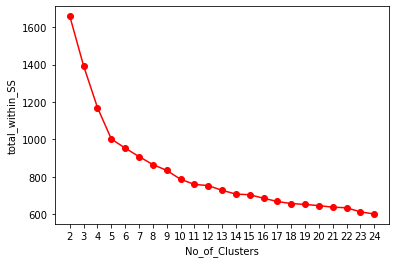

In [27]:
k=list(range(2,25))
twss=[]
for i in k :
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(norm_data)
    wss=[]
    for j in range(i):
        wss.append(sum(cdist(
                       norm_data.iloc[kmeans.labels_==j,:],
                       kmeans.cluster_centers_[j].reshape(1,norm_data.shape[1]),
                       "euclidean"))
                  )
                   
    twss.append(sum(wss))   
    
plt.plot(k,twss, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)    

In [28]:
model=KMeans(n_clusters=5)

In [29]:
model.fit(norm_data)

KMeans(n_clusters=5)

In [30]:
model.labels_ # getting the labels of clusters assigned to each row 

array([1, 1, 1, ..., 4, 3, 3])

In [31]:
md=pd.Series(model.labels_)  # converting numpy array into pandas series object 

In [32]:
df['clust']=md # creating a  new column and assigning it to new column 

In [33]:
df.head()

,clust,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,1,28143,0,1,1,1,174,1,0,0,7000,0
1,1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,1,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,1,4,14776,0,1,1,1,500,1,0,0,6952,0
4,4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


# Grouping Clusters by their mean

In [34]:
df.iloc[:,2:].groupby(df.clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clust,,,,,,,,,,,
0,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1.0
1,49921.633641,89.903226,1.122120,1.019585,1.001152,3467.074885,6.913594,243.834101,0.728111,5567.925115,0.0
2,118297.325243,73.467638,3.584142,1.001618,1.022654,31384.393204,17.233010,224.100324,0.627832,4419.553398,0.0
3,33097.301357,94.131783,1.070736,1.016473,1.006783,3244.520349,6.173450,212.850775,0.603682,1992.402132,0.0
4,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1.0
